In [9]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

import model as NN
import dataloader as DL
import loss_function as loss

In [3]:
# Loading data file

infile = open('../dataset/mnist.pkl','rb')
mnist_data = pickle.load(infile)
infile.close()

In [4]:
mnist_data.keys()

dict_keys(['Xtest', 'ytest', 'Xtrain', 'ytrain'])

In [6]:
batchsize = 20

train_loader = DL.dataLoader(mnist_data['Xtrain'], mnist_data['ytrain'], batchsize)
test_loader = DL.dataLoader(mnist_data['Xtest'], mnist_data['ytest'], batchsize)


In [7]:
model = NN.Network(400, 10, [50, 20, 30 ])

In [10]:
num_epochs = 100
training_loss = {}
training_accuracy = {}
num_train_batches = mnist_data['Xtrain'].shape[0] / batchsize
alpha = 0.02

ind = 0
for e in range(1, num_epochs + 1):
    train_loader = DL.dataLoader(mnist_data['Xtrain'], mnist_data['ytrain'], batchsize)
    training_loss.update({e: 0.0})
    training_accuracy.update({e: 0.0})

    for image, label in train_loader:
        
        # Forward pass
        pred = model.forward(image)
        # Backward pass
        model.backward(image, label)
        # Update
        model.update(alpha)
        # Calculate training loss and accuracy (Homework, see lecture)

        training_loss[e] += loss.crossentropy(pred, label)
        # print(NN.crossentropy(NN.softmax(pred), label_onehot))
        #         print(NN.crossentropy(pred,label))
        training_accuracy[e] += loss.ave_accuracy(pred, label)
        # exit(1)
    #     break

    # At each epoch 'e', print training loss and accuracy (homework)
    training_loss[e] = training_loss[e] / num_train_batches
    training_accuracy[e] = training_accuracy[e] / num_train_batches
    print(f'{e}th training loss = {training_loss[e]}\n{e}th training accuracy = {training_accuracy[e]}')



1th training loss = 2.300588310688372
1th training accuracy = [0.13625]
2th training loss = 2.28508780857587
2th training accuracy = [0.17125]
3th training loss = 2.242534100477234
3th training accuracy = [0.19175]
4th training loss = 2.04445884765439
4th training accuracy = [0.29025]
5th training loss = 1.548676263573644
5th training accuracy = [0.44125]
6th training loss = 1.202538247524273
6th training accuracy = [0.5755]
7th training loss = 0.9675340239028206
7th training accuracy = [0.704]
8th training loss = 0.7265374437516712
8th training accuracy = [0.7905]
9th training loss = 0.5815561130311377
9th training accuracy = [0.82925]
10th training loss = 0.48799392038011385
10th training accuracy = [0.8635]
11th training loss = 0.4318121249591971
11th training accuracy = [0.87875]
12th training loss = 0.3890425238329508
12th training accuracy = [0.8915]
13th training loss = 0.35846128893400975
13th training accuracy = [0.90025]
14th training loss = 0.3285436973435765
14th training a

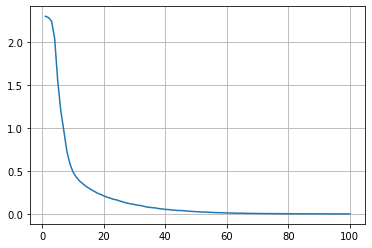

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(list(training_loss.keys()), list(training_loss.values()))
ax.grid()